In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import json
import os
import page_ranker as pr
import inspect_subgraph as isg

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cwd = os.getcwd()

dir_as_list = cwd.split('/')
base_path=''
go = True
i=0
while go:
    base_path= base_path+dir_as_list[i]+'/'
    if dir_as_list[i]=='research':
        go = False
    i=i+1
    
rel_path = "sample-graphs/sourcecred_sourcecred.json"

abs_file_path = os.path.abspath(os.path.join(base_path, rel_path))

In [3]:
import sys
infra_path = 'infra/'
sys.path.insert(0, os.path.join(base_path, infra_path))
import import_graph as ig

In [4]:
with open(abs_file_path) as json_file:  
    data = json.load(json_file)

In [5]:
G = ig.json_to_graph(data)

nodes
4130
{'address': ('sourcecred', 'github', 'PULL', 'sourcecred', 'sourcecred', '708'), 'type': 'github/pull', 'color': (0.0, 0.503921568627451, 1.0, 1.0), 'label': 'pull'}
3035
{'address': ('sourcecred', 'github', 'COMMENT', 'REVIEW', 'sourcecred', 'sourcecred', '708', '151528085', '214458072'), 'type': 'github/comment', 'color': (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), 'label': 'comment'}
5652
{'address': ('sourcecred', 'github', 'REVIEW', 'sourcecred', 'sourcecred', '708', '151528085'), 'type': 'github/review', 'color': (1.0, 0.5816993464052289, 0.0, 1.0), 'label': 'review'}
6077
{'address': ('sourcecred', 'github', 'USERLIKE', 'USER', 'wchargin'), 'type': 'github/user', 'color': (0.0, 0.0, 0.5, 1.0), 'label': 'wchargin'}

edges
(3035, 5652, 0)
{'address': ('sourcecred', 'github', 'HAS_PARENT', '9', 'sourcecred', 'github', 'COMMENT', 'REVIEW', 'sourcecred', 'sourcecred', '708', '151528085', '214458072'), 'type': 'github/hasParent'}
(5652, 4130, 0)
{'address': ('source

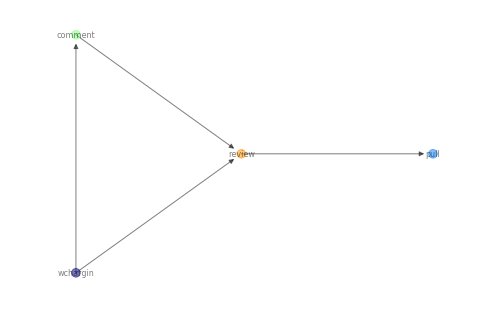

In [6]:
isg.inspectSubGraph(G, [3035,5652], expand=True, verbose=True, label=True,pos = "kk")

In [7]:
#use the above subgraph as a simple reference case: "comment on my own review"

nodes
4000
{'address': ('sourcecred', 'github', 'PULL', 'sourcecred', 'sourcecred', '557'), 'type': 'github/pull', 'color': (0.0, 0.503921568627451, 1.0, 1.0), 'label': 'pull'}
2897
{'address': ('sourcecred', 'github', 'COMMENT', 'REVIEW', 'sourcecred', 'sourcecred', '557', '141306711', '205932030'), 'type': 'github/comment', 'color': (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), 'label': 'comment'}
5443
{'address': ('sourcecred', 'github', 'REVIEW', 'sourcecred', 'sourcecred', '557', '141306711'), 'type': 'github/review', 'color': (1.0, 0.5816993464052289, 0.0, 1.0), 'label': 'review'}
6077
{'address': ('sourcecred', 'github', 'USERLIKE', 'USER', 'wchargin'), 'type': 'github/user', 'color': (0.0, 0.0, 0.5, 1.0), 'label': 'wchargin'}

edges
(2897, 5443, 0)
{'address': ('sourcecred', 'github', 'HAS_PARENT', '9', 'sourcecred', 'github', 'COMMENT', 'REVIEW', 'sourcecred', 'sourcecred', '557', '141306711', '205932030'), 'type': 'github/hasParent'}
(5443, 4000, 0)
{'address': ('source

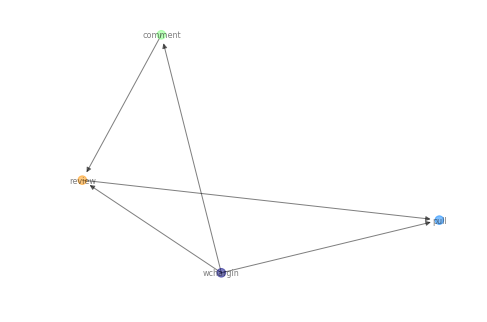

In [8]:
#comment on your own review then pull
isg.inspectSubGraph(G, [5443,2897], expand=True, verbose=True, label=True,pos = "kk")

nodes
5007
{'address': ('sourcecred', 'github', 'REVIEW', 'sourcecred', 'sourcecred', '305', '123797511'), 'type': 'github/review', 'color': (1.0, 0.5816993464052289, 0.0, 1.0), 'label': 'review'}
3746
{'address': ('sourcecred', 'github', 'PULL', 'sourcecred', 'sourcecred', '305'), 'type': 'github/pull', 'color': (0.0, 0.503921568627451, 1.0, 1.0), 'label': 'pull'}
6059
{'address': ('sourcecred', 'github', 'USERLIKE', 'USER', 'decentralion'), 'type': 'github/user', 'color': (0.0, 0.0, 0.5, 1.0), 'label': 'decentralion'}
2495
{'address': ('sourcecred', 'github', 'COMMENT', 'REVIEW', 'sourcecred', 'sourcecred', '305', '123797511', '191260475'), 'type': 'github/comment', 'color': (0.4901960784313725, 1.0, 0.4775458570524984, 1.0), 'label': 'comment'}

edges
(5007, 3746, 0)
{'address': ('sourcecred', 'github', 'HAS_PARENT', '7', 'sourcecred', 'github', 'REVIEW', 'sourcecred', 'sourcecred', '305', '123797511'), 'type': 'github/hasParent'}
(3746, 3746, 0)
{'address': ('sourcecred', 'github',

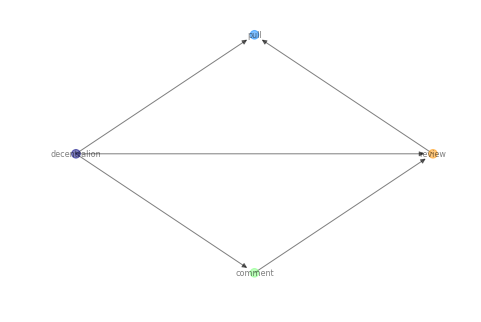

In [9]:
isg.inspectSubGraph(G, [5007,2495], expand=True, verbose=True, label=True,pos = "kk")

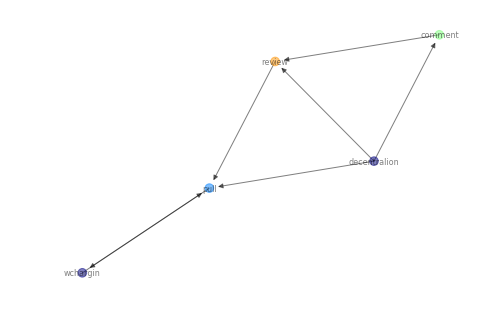

In [10]:
isg.inspectSubGraph(G,[6077,6059,5007,2495,3746], expand=False, verbose=False, label=True,pos = "kk")

In [11]:
ref = nx.subgraph(G,[6077,6059,5007,2495,3746])

In [12]:
def extract_base_case(graph, bunch):
    
    ref_graph = nx.subgraph(graph,bunch)
    num_nodes = len(ref_graph.nodes)
    node_indices = range(num_nodes)
    
    node_maps = [n for n in ref_graph.nodes]
    node_dict = {node_maps[i]:i for i in node_indices}
    node_types = nx.get_node_attributes(ref_graph,'type')
    edge_types = nx.get_edge_attributes(ref_graph,'type')
    
    mapped_node_types = {i:node_types[node_maps[i]] for i in node_indices}
    
    new_graph = nx.MultiDiGraph()
    
    for node in node_indices:
        new_graph.add_node(node)
        new_graph.nodes[node]['type'] = mapped_node_types[node]
    
    #new_graph.set_node_attibutes('type', mapped_node_types)
    
    mapped_edge_types = {}
    for edge in ref_graph.edges:
        old_edge_src = edge[0]
        new_edge_src = node_dict[old_edge_src]
        
        old_edge_dst = edge[1]
        new_edge_dst = node_dict[old_edge_dst]
        
        edge_counter = edge[2]
        
        new_graph.add_edge(new_edge_src,new_edge_dst)
        
        new_graph.edges[(new_edge_src,new_edge_dst,edge_counter)]['type']=edge_types[edge]
    
    
    return new_graph, node_dict

def add_comment(graph,comment_on, comment_by):
    g = graph.copy()
    node = len(g.nodes)
    
    if g.nodes[comment_by]['type'] != 'github/user':
        print("comment_by type must be 'github/user'")
        
    else:
        g.add_node(node)
        g.nodes[node]['type'] = 'github/comment'
        
        g.add_edge(node,comment_on)
        g.edges[(node,comment_on,0)]['type'] = 'github/hasParent'
        
        g.add_edge(comment_by,node)
        g.edges[(comment_by,node,0)]['type'] = 'github/authors'
        
    
    return g

In [13]:
bunch = [6077,6059,5007,2495,3746]

In [14]:
G.add_node(len(G.nodes))

In [15]:
[n for n in ref.nodes]

[3746, 6059, 5007, 6077, 2495]

In [16]:
rcg, nd=extract_base_case(G, bunch)

In [17]:
for e in rcg.edges:
    print(rcg.nodes[e[0]]['type'])
    print(rcg.edges[e])
    print(rcg.nodes[e[1]]['type'])
    print('')

github/pull
{'type': 'github/mentionsAuthor'}
github/pull

github/pull
{'type': 'github/references'}
github/user

github/user
{'type': 'github/authors'}
github/pull

github/user
{'type': 'github/authors'}
github/review

github/user
{'type': 'github/authors'}
github/comment

github/review
{'type': 'github/hasParent'}
github/pull

github/user
{'type': 'github/authors'}
github/pull

github/comment
{'type': 'github/hasParent'}
github/review



In [18]:
G.nodes[0]

{'address': ('sourcecred',
  'git',
  'COMMIT',
  '007cf88172d7ea9b0cdada78f124f7a41b811b30'),
 'type': 'git/commit'}

In [19]:
node_types = nx.get_node_attributes(ref,'type')

In [20]:
edge_types = nx.get_edge_attributes(ref,'type')

In [21]:
rcg.nodes[0]

{'type': 'github/pull'}

In [22]:
rcg.edges[(1,0,0)]

{'type': 'github/authors'}

In [23]:
ref.edges

OutMultiEdgeView([(3746, 3746, 0), (3746, 6077, 0), (6059, 3746, 0), (6059, 5007, 0), (6059, 2495, 0), (5007, 3746, 0), (6077, 3746, 0), (2495, 5007, 0)])

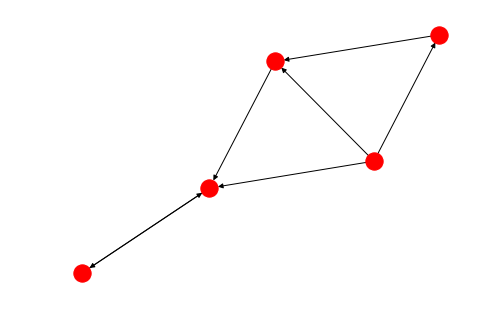

In [24]:
nx.draw_kamada_kawai(ref)

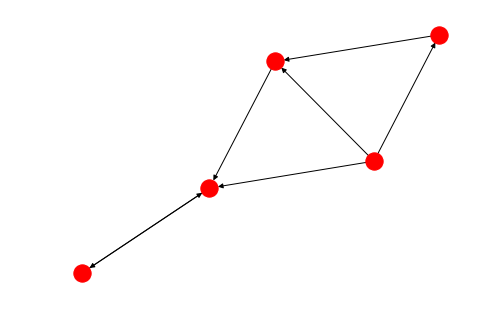

In [25]:
nx.draw_kamada_kawai(rcg)

In [26]:
rcg.edges[(0,0,0)]

{'type': 'github/mentionsAuthor'}

In [27]:
ref.edges[(3746, 3746, 0)]

{'address': ('sourcecred',
  'github',
  'MENTIONS_AUTHOR',
  '6',
  'sourcecred',
  'github',
  'PULL',
  'sourcecred',
  'sourcecred',
  '305',
  '6',
  'sourcecred',
  'github',
  'PULL',
  'sourcecred',
  'sourcecred',
  '305',
  '5',
  'sourcecred',
  'github',
  'USERLIKE',
  'USER',
  'wchargin'),
 'type': 'github/mentionsAuthor'}

In [28]:
rcg.nodes[4]['type']

'github/comment'

In [29]:
rcg.nodes[0]

{'type': 'github/pull'}

In [30]:
nd

{2495: 4, 3746: 0, 5007: 2, 6059: 1, 6077: 3}

In [34]:
bunch = [6077,6059,5007,2495,3746]
base_case, nd=extract_base_case(G, bunch)
spam_graphs = {0:base_case}

comment_count = 30
for s in range(1,comment_count):
    spam_graphs[s] = add_comment(spam_graphs[s-1],nd[5007] ,1)
    

#after constructing the spam graphs compare their page rank

In [35]:
iterations = 20


alpha = 0
self_loop_wt = 1/1000

In [37]:


results = {}
ratio = np.zeros(comment_count)
for s in range(comment_count):
    r, df,_ = pr.pageRanker(spam_graphs[s],
                         alpha,
                         iterations,
                         lazy=True,
                         self_loop_wt=self_loop_wt)
    results[s]=r
    #print(sum(r))
    ratio[s] = r[2]/r[3]
    
    

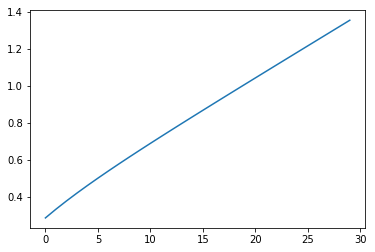

In [38]:
plt.plot(range(comment_count), ratio)

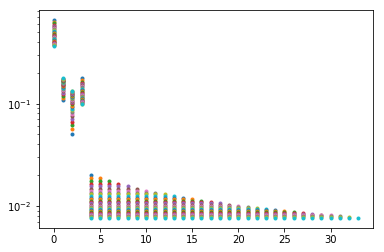

In [40]:
for s in range(comment_count):
    plt.semilogy(results[s], '.')

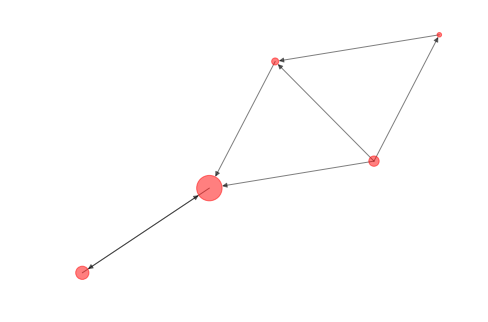

In [44]:
nx.draw_kamada_kawai(base_case, node_size = results[0]*1000, alpha=.5)

AttributeError: Unknown property logy

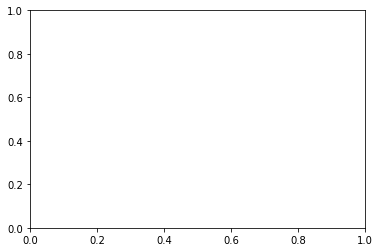

In [60]:
for s in range(comment_count):
    plt.bar(range(s+5),results[s], alpha=.)